In [85]:
#Importamos las libreias pandas, numpy y matplolib respectivamente 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from turtle import color
from sklearn.linear_model import LinearRegression


In [86]:
#Carga desde un archivo .xlsx sin indice 
df= pd.read_csv('Roma Entire home_apt.csv')
df.head()

id                                               name  \
0   3079.0          Cozy apartment  (2-4)with Colisseum  view   
1  12398.0                Casa Donatello - Home far from Home   
2  19965.0   S.Peter's Basilica 5 MIN WALK two large bedrooms   
3  50333.0  Bright&Cosy Penthouse Overlooking St. Peter's ...   
4  50471.0                     Cozy bright Loft in Trastevere   

                                         description  \
0  With the view of the Colisseum from the front ...   
1  Casa Donatello is a newly renovated two-bedroo...   
2  Bright and quiet two bedrooms apartment 3rd fl...   
3  Very bright and comfortable, impressive views ...   
4  Little loft in Trastevere is a charming studio...   

                               neighborhood_overview  host_id  \
0  Monti neighborhood is one of the best areas in...     3504   
1  You are at 15 minutes walking distance from hi...    11756   
2  Prati is a famous neighbourhood (rione of Rome...    75450   
3  There are plenty of shops nearby, small restau...   230736   
4  Trastevere Lovely and bright Loft is 35 mq, it...   231637   

         host_name  host_since host_location  host_response_time  \
0            Laura  08/10/2008   Rome, Italy  within a few hours   
1              Gea  30/03/2009   Rome, Italy      within an hour   
2             Sasa  30/01/2010   Rome, Italy      within an hour   
3  Sita Alessandra  10/09/2010   Rome, Italy      within an hour   
4          Lavinia  11/09/2010   Rome, Italy      within an hour   

  host_response_rate  ... neighbourhood_cleansed.1  \
0               100%  ...         I Centro Storico   
1               100%  ...        VIII Appia Antica   
2               100%  ...         I Centro Storico   
3               100%  ...         I Centro Storico   
4               100%  ...     II Parioli/Nomentano   

                     property_type.1      room_type.1  bathrooms_text.1  \
0  Private room in bed and breakfast     Private room    1 private bath   
1                       Private room     Private room         1.5 baths   
2                 Entire rental unit  Entire home/apt            1 bath   
3                 Entire rental unit  Entire home/apt            1 bath   
4                 Entire rental unit  Entire home/apt            1 bath   

                                         amenities.1 has_availability  \
0  ["Air conditioning", "Safe", "Crib", "Cleaning...                t   
1  ["Air conditioning", "Wine glasses", "Dining t...                t   
2  ["Dedicated workspace", "Ethernet connection",...                t   
3  ["Air conditioning", "Crib", "Wine glasses", "...                t   
4  ["Crib", "Wine glasses", "Dining table", "Dedi...                t   

  instant_bookable  host_total_listings_count  review_scores_accuracy  \
0                t                         54                    5.00   
1                f                          7                    4.60   
2                f                         11                    4.38   
3                f                          2                    4.86   
4                f                          2                    4.89   

  host_is_superhost  
0                 f  
1                 f  
2                 t  
3                 f  
4                 f  

[5 rows x 66 columns]

In [87]:
df['price'] = df['price'].fillna('0').astype(str)
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(float)


C:\Users\diego\AppData\Local\Temp\ipykernel_11052\2137133307.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['host_is_superhost'] = df['host_is_superhost'].fillna(method='ffill')


<Axes: xlabel='host_id', ylabel='price'>

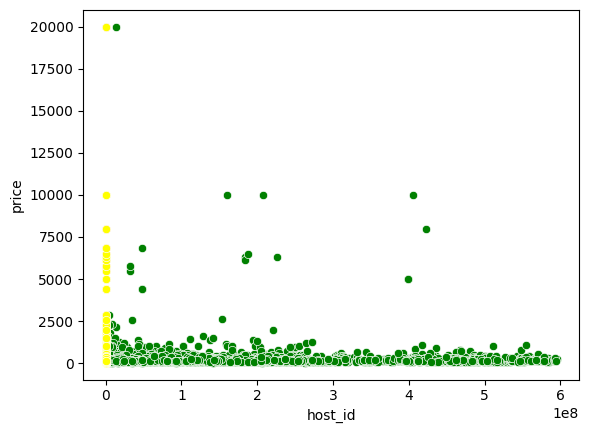

In [88]:
df['host_is_superhost'] = df['host_is_superhost'].fillna(method='ffill')
df['host_is_superhost'] = df['host_is_superhost'].map({'t': True, 'f': False, 'Sin identificar': False})
df['host_is_superhost'] = df['host_is_superhost'].astype(int)

sns.scatterplot(x='host_id', y='price', color="green", data=df)
sns.scatterplot(x='host_acceptance_rate', y='price', color="red", data=df)
sns.scatterplot(x='availability_90', y='price', color="yellow", data=df)

In [89]:
Vars_Indep= df[['host_id', 'review_scores_communication','availability_90']]
Var_Dep= df['price']

In [90]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)


sklearn.linear_model._base.LinearRegression

In [91]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [92]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
model.score(Vars_Indep,Var_Dep)

0.0030420766184507952

In [93]:
y_pred= model.predict(X=df[['host_id', 'review_scores_communication', 'availability_90']])
y_pred

array([188.11472592, 228.89424321, 218.70603356, ..., 208.59477319,
       244.13219614, 251.70866854])

In [94]:
#Insertamos la columna de predicciones en el DataFrame
df.insert(0, 'Predicciones', y_pred)
df

Predicciones            id  \
0       188.114726  3.079000e+03   
1       228.894243  1.239800e+04   
2       218.706034  1.996500e+04   
3       218.709236  5.033300e+04   
4       212.432108  5.047100e+04   
...            ...           ...   
5166    244.649104  1.210000e+18   
5167    247.252356  1.220000e+18   
5168    208.594773  1.220000e+18   
5169    244.132196  1.230000e+18   
5170    251.708669  1.240000e+18   

                                                   name  \
0             Cozy apartment  (2-4)with Colisseum  view   
1                   Casa Donatello - Home far from Home   
2      S.Peter's Basilica 5 MIN WALK two large bedrooms   
3     Bright&Cosy Penthouse Overlooking St. Peter's ...   
4                        Cozy bright Loft in Trastevere   
...                                                 ...   
5166                  URent | CoppedÃ¨ Luxury Apartment   
5167                                 Rome Phoenix Suite   
5168                     Grande Inmueble EUR-Laurentina   
5169                        Mercadante Deluxe Apartment   
5170                URent | CasaLino Charming Apartment   

                                            description  \
0     With the view of the Colisseum from the front ...   
1     Casa Donatello is a newly renovated two-bedroo...   
2     Bright and quiet two bedrooms apartment 3rd fl...   
3     Very bright and comfortable, impressive views ...   
4     Little loft in Trastevere is a charming studio...   
...                                                 ...   
5166  The CoppedÃ¨ Luxury Apartment is a charming 12...   
5167  Cozy entrance, designed to make you feel at ho...   
5168  Our accommodation is in a spacious 130m2 apart...   
5169  Elegant apartment located in the heart of the ...   
5170  Located in the heart of Rome's quiet Lodi dist...   

                                  neighborhood_overview    host_id  \
0     Monti neighborhood is one of the best areas in...       3504   
1     You are at 15 minutes walking distance from hi...      11756   
2     Prati is a famous neighbourhood (rione of Rome...      75450   
3     There are plenty of shops nearby, small restau...     230736   
4     Trastevere Lovely and bright Loft is 35 mq, it...     231637   
...                                                 ...        ...   
5166                                         Indefinido  577844334   
5167                                         Indefinido  593911281   
5168                                         Indefinido  293074792   
5169                                         Indefinido  546292513   
5170                                         Indefinido  577844334   

            host_name  host_since host_location  host_response_time  ...  \
0               Laura  08/10/2008   Rome, Italy  within a few hours  ...   
1                 Gea  30/03/2009   Rome, Italy      within an hour  ...   
2                Sasa  30/01/2010   Rome, Italy      within an hour  ...   
3     Sita Alessandra  10/09/2010   Rome, Italy      within an hour  ...   
4             Lavinia  11/09/2010   Rome, Italy      within an hour  ...   
...               ...         ...           ...                 ...  ...   
5166     Maria Grazia  16/05/2024   Rome, Italy  within a few hours  ...   
5167         Federica  03/08/2024   Rome, Italy      within an hour  ...   
5168           Carlos  08/09/2019   Rome, Italy      within an hour  ...   
5169         Gabriele  13/11/2023   Rome, Italy      within an hour  ...   
5170     Maria Grazia  16/05/2024   Rome, Italy  within a few hours  ...   

     neighbourhood_cleansed.1                    property_type.1  \
0            I Centro Storico  Private room in bed and breakfast   
1           VIII Appia Antica                       Private room   
2            I Centro Storico                 Entire rental unit   
3            I Centro Storico                 Entire rental unit   
4        II Parioli/Nomentano                 Entire rental u

In [95]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0030420766184507952

In [96]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.055155023510563346